In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [66]:
# Load data (assuming the CSV file formating is exactly as it was downloaded from 
# Byteflies Cloud and the files are sitting in the same directory as your script or notebook)
eeg = pd.read_csv("./KRHXKXA-BTF6DAED5-20201007-20201008/2020-10-07-101846543_8225c7fc-5699-43ff-a060-6875ba46530b_EEG_1.csv", names=["time", "raw"], skiprows=1)
acc = pd.read_csv("./KRHXKXA-BTF6DAED5-20201007-20201008/2020-10-07-101846543_8225c7fc-5699-43ff-a060-6875ba46530b_ACC.csv", names=["time", "x", "y", "z"], skiprows=1)

In [67]:
eeg.head()

,time,raw
0,0.16748,-1255
1,0.17148,-1232
2,0.17548,-1201
3,0.17948,-1207
4,0.18348,-1209


In [68]:
acc.head()

,time,x,y,z
0,0.197449,4360,1409,-274
1,0.207449,4400,1495,-234
2,0.217449,4326,1373,43
3,0.227449,4147,1449,111
4,0.237449,3907,1376,130


In [69]:
# Get the start timestamp for the Recording from the Recording detail page on the 
# Byteflies files and fill it out below (YYYY,MM,DD,HH,MM,SS,uS) [uS = microseconds, 
# i.e. File milliseconds * 1000] 
start_dt = datetime(2020,10,7,18,46,53,8225)
start_ts = start_dt.timestamp()

In [71]:
# Convert Signals to correct unit (note that this is a linear transformation and thus
# not strictly necessary)
eeg_list = eeg.keys()
acc_list = acc.keys()

In [72]:
for i in range(len(eeg_list)-1):
    eeg[eeg_list[i+1]] *= 0.4808  # To nV

for i in range(len(acc_list)-1):
    acc[acc_list[i+1]] *= 0.0002  # To g

In [73]:
# Convert the time values in seconds to a datetime index for easier plotting and Signal comparison
t_ns_eeg = (start_ts + eeg["time"])*1e9
eeg.index = t_ns_eeg.astype("datetime64[ns]")
eeg.drop(["time"], axis=1, inplace=True)

t_ns_acc = (start_ts + acc["time"])*1e9 
acc.index = t_ns_acc.astype("datetime64[ns]")
acc.drop(["time"], axis=1, inplace=True)

No handles with labels found to put in legend.


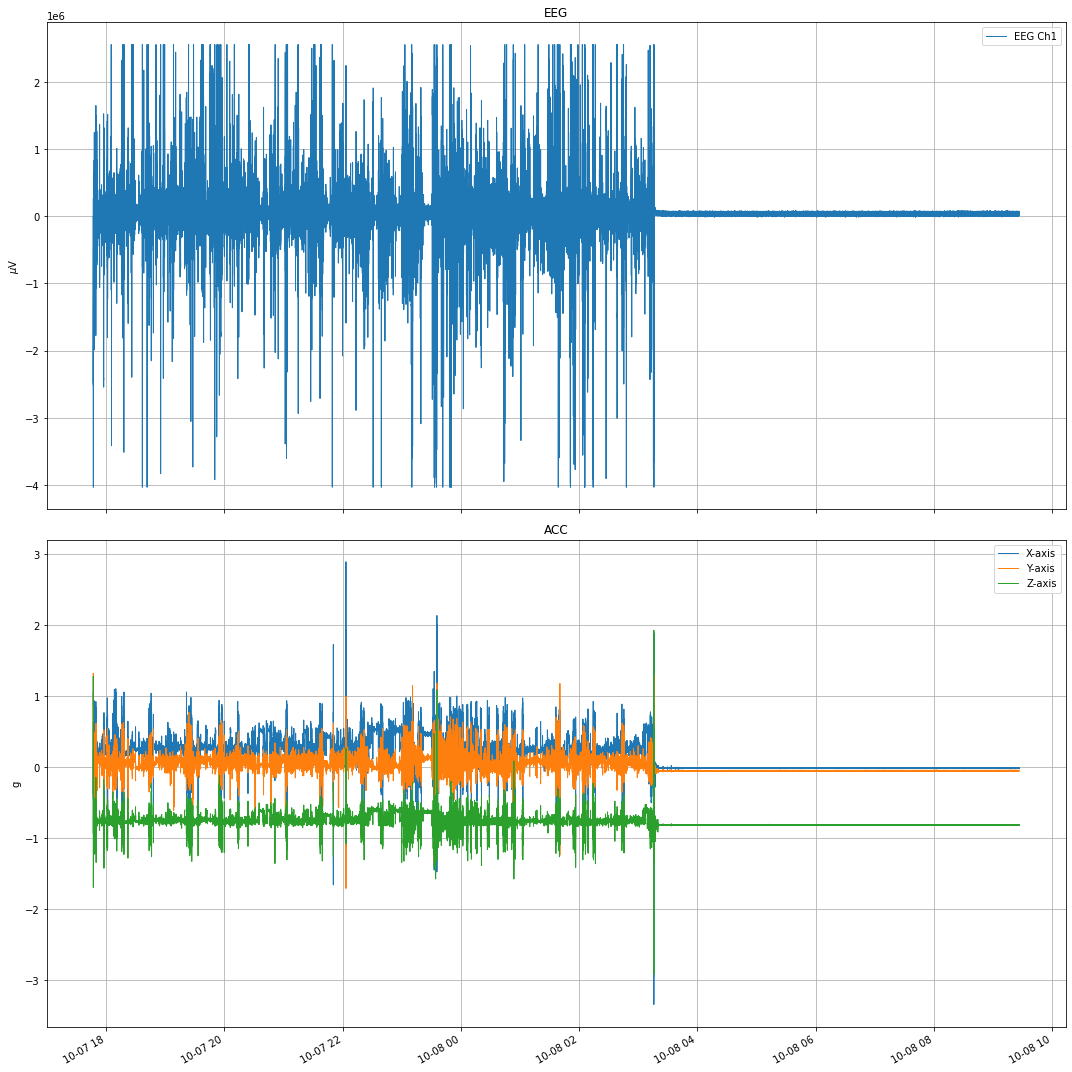

In [74]:
# Plot the data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize=(15,15))
ax1.plot(eeg, lw=1)
ax1.grid()
ax1.set_title("EEG")
ax1.set_ylabel(r"$\mu$V")
ax1.legend(["EEG Ch1"], loc="best")

ax2.plot(acc, lw=1)
ax2.grid()
ax2.set_title("ACC")
ax2.set_ylabel("g")
ax2.legend(loc="best")
ax2.legend(["X-axis", "Y-axis", "Z-axis"], loc="best")

fig.autofmt_xdate()
plt.show()


3 channels is perfectly normal for an ACC or GYR signal (as there are 3 axes to get data from).
For the biopotential signals (EEG, ECG, EMG, EOG); you can activate 1 biopotential channel  (if only 2 electrodes are used) or 2 biopotential channels (if 4 electrodes are used). This can be configured in configuration mode. 
